In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
data = pd.read_excel('Kurs.xlsx')
data

,№,Link,Type of NFT,Collection,Author,First sale price,Amount of sales,Date of first sale,Last sale,Collection's total volume,Collection's all time average price,Items (collection),Owners / trades (collection),Author joined,Verification,Authors Total volume,Created by author,Medium (NFT),Max price of NFT-object
0,1,https://opensea.io/assets/ethereum/0x495f94727...,Collectibles,Doug TenNapel's Eternal Klay,DougTenNapelLLC,0.2000,3,5 months (January 24 2022),0.0690,348.5561,0.1005,2923,1200,April 2021,1,348.8561,3122,Picture,0.0690
1,2,https://opensea.io/assets/ethereum/0x4b530443a...,Collectibles,REV3AL REBORN,REV3AL_REBORN,0.0099,2,7 days (June 6 2022),0.0030,125.3789,0.0235,5500,1900,June 2022,1,125.3789,5500,Picture,0.0099
2,3,https://opensea.io/assets/ethereum/0xed5af3886...,Collectibles,Azuki,TeamAzuki,5.6000,5,5 months (January 26 2022),7.5000,247259.4337,9.4754,10000,5200,January 2022,1,247259.4337,10000,Picture,29.5000
3,4,https://opensea.io/assets/ethereum/0x83ddafaa7...,Collectibles,The Other Avatars by Saatchi Art,SaatchiArtOfficial,0.0900,2,5 months (January 26 2022),0.0500,210.0016,0.1517,2523,1300,January 2022,1,210.0016,1300,Picture,0.0900
4,5,https://opensea.io/assets/ethereum/0x466cfcd05...,Collectibles,Dooplicator,Doodles_LLC,2.6300,2,19 days (May 29 2022),2.2500,3485.0115,2.9863,8948,5300,June 2022,1,137614.5579,24409,GIF,2.6300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,https://opensea.io/assets/ethereum/0x76cb06476...,Music,monte booker x soulection,montebooker,0.1190,2,3 months (March 17 2022),0.0195,26.9583,0.0807,500,304,February 2022,0,26.9583,500,Picture Audio,0.1190
96,97,https://opensea.io/assets/ethereum/0xc36cf0cfc...,Music,Snoop Dogg - B.O.D.R,\ncooltown,1.1928,2348,4 months (February 11 2022),1.1000,1026.2008,0.4190,29,3200,June 2020,1,1026.2008,29,Video Audio,2.5000
97,98,https://opensea.io/assets/ethereum/0xfb3765e0e...,Music,Audioglyphs,0x1b9,0.1000,2,9 months (September 2 2021),0.0300,1114.8333,0.1302,10000,2700,July 2021,0,1654.2394,23294,Video Audio,0.1000
98,99,https://opensea.io/assets/ethereum/0x52e66ca96...,Music,The Orbs by BT,\nBAFD93,1.2400,3,4 months (February 16 2022),0.2650,2459.0273,1.4994,3333,1400,August 2021,0,2459.0273,3333,GIF Audio,1.2400


In [201]:
data['Type of NFT'].value_counts()

Photography     25
Art             25
Collectibles    25
Music           25
Name: Type of NFT, dtype: int64

**Найдём среднюю цену на NFT объекты среди всех категорий и определим, в каких категориях сколько объектов**

In [202]:
av_sale = (data['Last sale'].mean())
av_sale

2.103468

In [225]:
types = list(data['Type of NFT'].unique())

[4, 7, 0, 1] [21, 18, 25, 24]


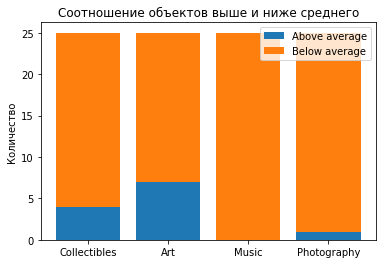

In [221]:
m = []
l = []
for i in types:
    more = 0
    less = 0
    for n in range(len(data['Type of NFT'])):
        if data['Type of NFT'][n] == i:
            if data['Last sale'][n] >= av_sale:
                more += 1 
            else:
                less += 1
    m.append(more)
    l.append(less)
print(m, l)
fig, ax = plt.subplots()
ax.bar(types, m, label='Above average')
ax.bar(types, l, bottom=m, label='Below average')

ax.set_ylabel('Количество')
ax.set_title('Соотношение объектов выше и ниже среднего')
ax.legend()

plt.show()
    

**При сравнении по средней цене стало понятно, что в выборке есть сильные выбросы**

In [226]:
mean = []
for i in types:
    mean.append(np.mean(data[data['Type of NFT'] == i]['Last sale']))
b = pd.DataFrame({'Среднее': mean, 'Тип NFT': types})
b.set_index('Тип NFT', inplace = True)
b

,Среднее
Тип NFT,
Collectibles,1.073676
Art,5.928336
Music,0.188380
Photography,1.223480


In [227]:
data.columns

Index(['№', 'Link', 'Type of NFT', 'Collection', 'Author', 'First sale price',
       'Amount of sales', 'Date of first sale', 'Last sale',
       'Collection's total volume', 'Collection's all time average price',
       'Items (collection)', 'Owners / trades (collection)', 'Author joined',
       'Verification', 'Authors Total volume', 'Created by author',
       'Medium (NFT)', 'Max price of NFT-object'],
      dtype='object')

In [228]:
st = []
for i in types:
    st.append(np.std(data[data['Type of NFT'] == i]['Last sale']))
a = pd.DataFrame({'Дисперсия': st, 'Тип NFT': types})
a.set_index('Тип NFT', inplace = True)
a

,Дисперсия
Тип NFT,
Collectibles,2.116838
Art,16.905066
Music,0.285496
Photography,4.083442


In [229]:
x = np.arange(1,26)

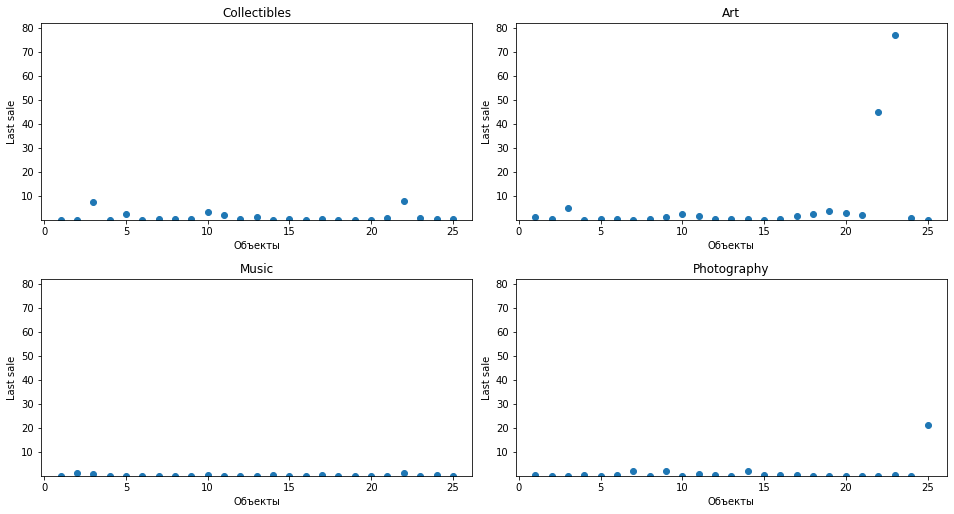

In [230]:
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(14, 7))

axarr[0,0].scatter(x, data[data['Type of NFT'] == 'Collectibles']['Last sale'],
                 label='Collectibles')
axarr[0,1].scatter(x, data[data['Type of NFT'] == 'Art']['Last sale'],
                 label='Art')
axarr[1,0].scatter(x, data[data['Type of NFT'] == 'Music']['Last sale'],
                 label='Music')
axarr[1,1].scatter(x, data[data['Type of NFT'] == 'Photography']['Last sale'],
                 label='Photography')
axarr[0,0].title.set_text('Collectibles')
axarr[0,0].set_ylabel('Last sale')
axarr[0,0].set_xlabel('Объекты')
axarr[0,1].title.set_text('Art')
axarr[0,1].set_ylabel('Last sale')
axarr[0,1].set_xlabel('Объекты')
axarr[1,0].title.set_text('Music')
axarr[1,0].set_ylabel('Last sale')
axarr[1,0].set_xlabel('Объекты')
axarr[1,1].title.set_text('Photography')
axarr[1,1].set_ylabel('Last sale')
axarr[1,1].set_xlabel('Объекты')
axarr[0,0].set_ylim([min(data['Last sale']), max(data['Last sale'])+5])
axarr[0,1].set_ylim([min(data['Last sale']), max(data['Last sale'])+5])
axarr[1,0].set_ylim([min(data['Last sale']), max(data['Last sale'])+5])
axarr[1,1].set_ylim([min(data['Last sale']), max(data['Last sale'])+5])
plt.subplots_adjust(left=0.001,
                    bottom=0.001, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.3)
plt.show()
#ax.legend()

**Настроили одни и те же оси, вот выбросы**

In [231]:
d = pd.read_excel('Kursovaya.xlsx')


In [232]:
d['Type of NFT'].value_counts()

Collectibles    25
Music           25
Photography     24
Art             23
Name: Type of NFT, dtype: int64

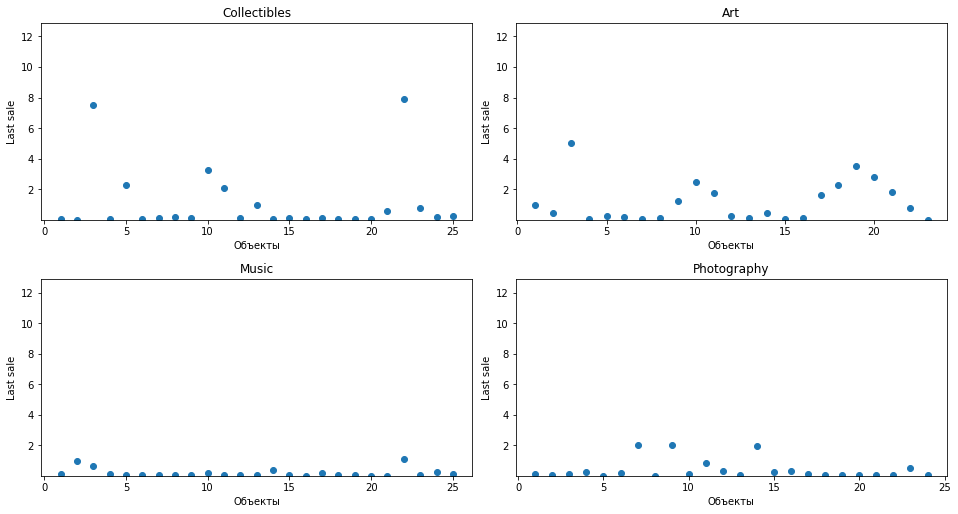

In [233]:
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(14, 7))

axarr[0,0].scatter(np.arange(1,26), d[d['Type of NFT'] == 'Collectibles']['Last sale'],
                 label='Collectibles')
axarr[0,1].scatter(np.arange(1,24), d[d['Type of NFT'] == 'Art']['Last sale'],
                 label='Art')
axarr[1,0].scatter(np.arange(1,26), d[d['Type of NFT'] == 'Music']['Last sale'],
                 label='Music')
axarr[1,1].scatter(np.arange(1,25), d[d['Type of NFT'] == 'Photography']['Last sale'],
                 label='Photography')
axarr[0,0].title.set_text('Collectibles')
axarr[0,0].set_ylabel('Last sale')
axarr[0,0].set_xlabel('Объекты')
axarr[0,1].title.set_text('Art')
axarr[0,1].set_ylabel('Last sale')
axarr[0,1].set_xlabel('Объекты')
axarr[1,0].title.set_text('Music')
axarr[1,0].set_ylabel('Last sale')
axarr[1,0].set_xlabel('Объекты')
axarr[1,1].title.set_text('Photography')
axarr[1,1].set_ylabel('Last sale')
axarr[1,1].set_xlabel('Объекты')
axarr[0,0].set_ylim([min(d['Last sale']), max(d['Last sale'])+5])
axarr[0,1].set_ylim([min(d['Last sale']), max(d['Last sale'])+5])
axarr[1,0].set_ylim([min(d['Last sale']), max(d['Last sale'])+5])
axarr[1,1].set_ylim([min(d['Last sale']), max(d['Last sale'])+5])
plt.subplots_adjust(left=0.001,
                    bottom=0.001, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.3)
plt.show()


**Средняя цена для выборки без выбросов**

In [234]:
av_sale2 = (d['Last sale'].mean())
av_sale2

0.6942969072164947

[7, 11, 2, 4] [18, 12, 23, 20]


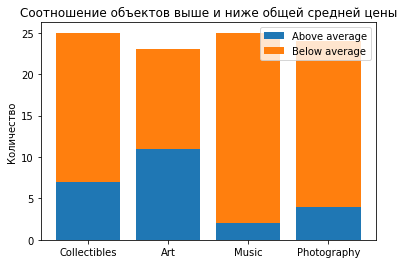

In [235]:
m = []
l = []
for i in types:
    more = 0
    less = 0
    for n in range(len(d['Type of NFT'])):
        if d['Type of NFT'][n] == i:
            if d['Last sale'][n] >= av_sale2:
                more += 1 
            else:
                less += 1
    m.append(more)
    l.append(less)
print(m, l)
fig, ax = plt.subplots()
ax.bar(types, m, label='Above average')
ax.bar(types, l, bottom=m, label='Below average')

ax.set_ylabel('Количество')
ax.set_title('Соотношение объектов выше и ниже общей средней цены')
ax.legend()

plt.show()
    

**Среднее по каждой категории для последней и первой цены**

In [218]:
mean = []
for i in types:
    mean.append(np.mean(d[d['Type of NFT'] == i]['Last sale']))
b = pd.DataFrame({'Среднее': mean, 'Тип NFT': types})
b.set_index('Тип NFT', inplace = True)
b

,Среднее
Тип NFT,
Collectibles,1.073676
Art,1.139496
Music,0.188380
Photography,0.399458


In [220]:
mean_first = []
for i in types:
    mean_first.append(np.mean(d[d['Type of NFT'] == i]['First sale price']))
e = pd.DataFrame({'Среднее': mean_first, 'Тип NFT': types})
e.set_index('Тип NFT', inplace = True)
e

,Среднее
Тип NFT,
Collectibles,0.653956
Art,1.174596
Music,0.235348
Photography,0.257083


In [236]:
st = []
for i in types:
    st.append(np.std(d[d['Type of NFT'] == i]['Last sale']))
a = pd.DataFrame({'Среднеквадратическое отклонение': st, 'Тип NFT': types})
a.set_index('Тип NFT', inplace = True)
a

,Среднеквадратическое отклонение
Тип NFT,
Collectibles,2.116838
Art,1.307108
Music,0.285496
Photography,0.627674


Средняя цена сильно отличается для разных объектов. Вывод, в среднем collectibles стоят больше, но выбросов много в art. Создадим дамми перемнную цена выше среднего

In [160]:
dummy = []
d['Above average'] = np.array([0] * len(d))
for i in range(len(types)):
    for n in range(len(d)):
        if d['Type of NFT'][n] == types[i]:
            if d['Last sale'][n] >= mean[i]:
                d['Above average'][n] = 1
            else:
                d['Above average'][n] = 0
d

<ipython-input-160-bcdaf5916820>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Above average'][n] = 0
<ipython-input-160-bcdaf5916820>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Above average'][n] = 1


,№,Link,Type of NFT,Collection,Author,First sale price,Amount of sales,Date of first sale,Last sale,Collection's total volume,...,Items (collection),Owners / trades (collection),Author joined,Verification,Authors Total volume,Created by author,Medium (NFT),Max price of NFT-object,Number of months,Above average
0,1,https://opensea.io/assets/ethereum/0x495f94727...,Collectibles,Doug TenNapel's Eternal Klay,DougTenNapelLLC,0.2000,3,5 months (January 24 2022),0.0690,348.5561,...,2923,1200,April 2021,1,348.8561,3122,Picture,0.0690,14.0,0
1,2,https://opensea.io/assets/ethereum/0x4b530443a...,Collectibles,REV3AL REBORN,REV3AL_REBORN,0.0099,2,20 days (May 28 2022),0.0030,125.3789,...,5500,1900,June 2022,1,125.3789,5500,Picture,0.0099,1.0,0
2,3,https://opensea.io/assets/ethereum/0xed5af3886...,Collectibles,Azuki,TeamAzuki,5.6000,5,5 months (January 26 2022),7.5000,247259.4337,...,10000,5200,January 2022,1,247259.4337,10000,Picture,29.5000,5.0,1
3,4,https://opensea.io/assets/ethereum/0x83ddafaa7...,Collectibles,The Other Avatars by Saatchi Art,SaatchiArtOfficial,0.0900,2,5 months (January 26 2022),0.0500,210.0016,...,2523,1300,January 2022,1,210.0016,1300,Picture,0.0900,5.0,0
4,5,https://opensea.io/assets/ethereum/0x466cfcd05...,Collectibles,Dooplicator,Doodles_LLC,2.6300,2,19 days (May 29 2022),2.2500,3485.0115,...,8948,5300,June 2022,1,137614.5579,24409,GIF,2.6300,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,https://opensea.io/assets/ethereum/0x76cb06476...,Music,monte booker x soulection,montebooker,0.1190,2,3 months (March 17 2022),0.0195,26.9583,...,500,304,February 2022,0,26.9583,500,Picture Audio,0.1190,4.0,0
93,94,https://opensea.io/assets/ethereum/0xc36cf0cfc...,Music,Snoop Dogg - B.O.D.R,\ncooltown,1.1928,2348,4 months (February 11 2022),1.1000,1026.2008,...,29,3200,June 2020,1,1026.2008,29,Video Audio,2.5000,24.0,1
94,95,https://opensea.io/assets/ethereum/0xfb3765e0e...,Music,Audioglyphs,0x1b9,0.1000,2,9 months (September 2 2021),0.0300,1114.8333,...,10000,2700,July 2021,0,1654.2394,23294,Video Audio,0.1000,11.0,0
95,96,https://opensea.io/assets/ethereum/0x52e66ca96...,Music,The Orbs by BT,\nBAFD93,1.2400,3,4 months (February 16 2022),0.2650,2459.0273,...,3333,1400,August 2021,0,2459.0273,3333,GIF Audio,1.2400,11.0,1


[5, 9, 6, 5] [20, 14, 19, 19]


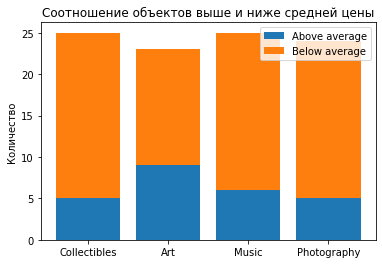

In [161]:
m = []
l = []
for i in types:
    more = 0
    less = 0
    for n in range(len(d['Type of NFT'])):
        if d['Type of NFT'][n] == i:
            if d['Above average'][n] == 1:
                more += 1 
            else:
                less += 1
    m.append(more)
    l.append(less)
print(m, l)
fig, ax = plt.subplots()
ax.bar(types, m, label='Above average')
ax.bar(types, l, bottom=m, label='Below average')

ax.set_ylabel('Количество')
ax.set_title('Соотношение объектов выше и ниже средней цены')
ax.legend()


plt.show()
    

**Отредактируем признаки:**
1) Дамми типа НФТ
2) Время последнего сейла
3) Посчитаем ликвидность - среднее количество сейлов в месяц
4) Отношение owner к item


In [237]:
d['Тип NFT'] = d['Type of NFT']

In [238]:
d = pd.get_dummies(d, prefix=['Type of NFT'], columns=['Type of NFT'])
d

,№,Link,Collection,Author,First sale price,Amount of sales,Date of first sale,Last sale,Collection's total volume,Collection's all time average price,...,Authors Total volume,Created by author,Medium (NFT),Max price of NFT-object,Number of months,Тип NFT,Type of NFT_Art,Type of NFT_Collectibles,Type of NFT_Music,Type of NFT_Photography
0,1,https://opensea.io/assets/ethereum/0x495f94727...,Doug TenNapel's Eternal Klay,DougTenNapelLLC,0.2000,3,5 months (January 24 2022),0.0690,348.5561,0.1005,...,348.8561,3122,Picture,0.0690,14.0,Collectibles,0,1,0,0
1,2,https://opensea.io/assets/ethereum/0x4b530443a...,REV3AL REBORN,REV3AL_REBORN,0.0099,2,20 days (May 28 2022),0.0030,125.3789,0.0235,...,125.3789,5500,Picture,0.0099,1.0,Collectibles,0,1,0,0
2,3,https://opensea.io/assets/ethereum/0xed5af3886...,Azuki,TeamAzuki,5.6000,5,5 months (January 26 2022),7.5000,247259.4337,9.4754,...,247259.4337,10000,Picture,29.5000,5.0,Collectibles,0,1,0,0
3,4,https://opensea.io/assets/ethereum/0x83ddafaa7...,The Other Avatars by Saatchi Art,SaatchiArtOfficial,0.0900,2,5 months (January 26 2022),0.0500,210.0016,0.1517,...,210.0016,1300,Picture,0.0900,5.0,Collectibles,0,1,0,0
4,5,https://opensea.io/assets/ethereum/0x466cfcd05...,Dooplicator,Doodles_LLC,2.6300,2,19 days (May 29 2022),2.2500,3485.0115,2.9863,...,137614.5579,24409,GIF,2.6300,1.0,Collectibles,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,https://opensea.io/assets/ethereum/0x76cb06476...,monte booker x soulection,montebooker,0.1190,2,3 months (March 17 2022),0.0195,26.9583,0.0807,...,26.9583,500,Picture Audio,0.1190,4.0,Music,0,0,1,0
93,94,https://opensea.io/assets/ethereum/0xc36cf0cfc...,Snoop Dogg - B.O.D.R,\ncooltown,1.1928,2348,4 months (February 11 2022),1.1000,1026.2008,0.4190,...,1026.2008,29,Video Audio,2.5000,24.0,Music,0,0,1,0
94,95,https://opensea.io/assets/ethereum/0xfb3765e0e...,Audioglyphs,0x1b9,0.1000,2,9 months (September 2 2021),0.0300,1114.8333,0.1302,...,1654.2394,23294,Video Audio,0.1000,11.0,Music,0,0,1,0
95,96,https://opensea.io/assets/ethereum/0x52e66ca96...,The Orbs by BT,\nBAFD93,1.2400,3,4 months (February 16 2022),0.2650,2459.0273,1.4994,...,2459.0273,3333,GIF Audio,1.2400,11.0,Music,0,0,1,0


In [240]:
days = []
n = 0
for i in range(len(d)):
    if d['Date of first sale'][i].split(' ')[1] == 'days' or d['Date of first sale'][i].split(' ')[1] == 'day':
        days.append(1)
    else:
        days.append(int(d['Date of first sale'][i].split(' ')[0]))
    n += 1
d['Months'] = days

In [241]:
d

,№,Link,Collection,Author,First sale price,Amount of sales,Date of first sale,Last sale,Collection's total volume,Collection's all time average price,...,Created by author,Medium (NFT),Max price of NFT-object,Number of months,Тип NFT,Type of NFT_Art,Type of NFT_Collectibles,Type of NFT_Music,Type of NFT_Photography,Months
0,1,https://opensea.io/assets/ethereum/0x495f94727...,Doug TenNapel's Eternal Klay,DougTenNapelLLC,0.2000,3,5 months (January 24 2022),0.0690,348.5561,0.1005,...,3122,Picture,0.0690,14.0,Collectibles,0,1,0,0,5
1,2,https://opensea.io/assets/ethereum/0x4b530443a...,REV3AL REBORN,REV3AL_REBORN,0.0099,2,20 days (May 28 2022),0.0030,125.3789,0.0235,...,5500,Picture,0.0099,1.0,Collectibles,0,1,0,0,1
2,3,https://opensea.io/assets/ethereum/0xed5af3886...,Azuki,TeamAzuki,5.6000,5,5 months (January 26 2022),7.5000,247259.4337,9.4754,...,10000,Picture,29.5000,5.0,Collectibles,0,1,0,0,5
3,4,https://opensea.io/assets/ethereum/0x83ddafaa7...,The Other Avatars by Saatchi Art,SaatchiArtOfficial,0.0900,2,5 months (January 26 2022),0.0500,210.0016,0.1517,...,1300,Picture,0.0900,5.0,Collectibles,0,1,0,0,5
4,5,https://opensea.io/assets/ethereum/0x466cfcd05...,Dooplicator,Doodles_LLC,2.6300,2,19 days (May 29 2022),2.2500,3485.0115,2.9863,...,24409,GIF,2.6300,1.0,Collectibles,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,https://opensea.io/assets/ethereum/0x76cb06476...,monte booker x soulection,montebooker,0.1190,2,3 months (March 17 2022),0.0195,26.9583,0.0807,...,500,Picture Audio,0.1190,4.0,Music,0,0,1,0,3
93,94,https://opensea.io/assets/ethereum/0xc36cf0cfc...,Snoop Dogg - B.O.D.R,\ncooltown,1.1928,2348,4 months (February 11 2022),1.1000,1026.2008,0.4190,...,29,Video Audio,2.5000,24.0,Music,0,0,1,0,4
94,95,https://opensea.io/assets/ethereum/0xfb3765e0e...,Audioglyphs,0x1b9,0.1000,2,9 months (September 2 2021),0.0300,1114.8333,0.1302,...,23294,Video Audio,0.1000,11.0,Music,0,0,1,0,9
95,96,https://opensea.io/assets/ethereum/0x52e66ca96...,The Orbs by BT,\nBAFD93,1.2400,3,4 months (February 16 2022),0.2650,2459.0273,1.4994,...,3333,GIF Audio,1.2400,11.0,Music,0,0,1,0,4


**Ликвидность**

In [243]:
d['Amount of sales'] = d['Amount of sales'].astype(int)
d['Liquidity'] = d['Amount of sales'] / d['Months']
d

,№,Link,Collection,Author,First sale price,Amount of sales,Date of first sale,Last sale,Collection's total volume,Collection's all time average price,...,Medium (NFT),Max price of NFT-object,Number of months,Тип NFT,Type of NFT_Art,Type of NFT_Collectibles,Type of NFT_Music,Type of NFT_Photography,Months,Liquidity
0,1,https://opensea.io/assets/ethereum/0x495f94727...,Doug TenNapel's Eternal Klay,DougTenNapelLLC,0.2000,3,5 months (January 24 2022),0.0690,348.5561,0.1005,...,Picture,0.0690,14.0,Collectibles,0,1,0,0,5,0.600000
1,2,https://opensea.io/assets/ethereum/0x4b530443a...,REV3AL REBORN,REV3AL_REBORN,0.0099,2,20 days (May 28 2022),0.0030,125.3789,0.0235,...,Picture,0.0099,1.0,Collectibles,0,1,0,0,1,2.000000
2,3,https://opensea.io/assets/ethereum/0xed5af3886...,Azuki,TeamAzuki,5.6000,5,5 months (January 26 2022),7.5000,247259.4337,9.4754,...,Picture,29.5000,5.0,Collectibles,0,1,0,0,5,1.000000
3,4,https://opensea.io/assets/ethereum/0x83ddafaa7...,The Other Avatars by Saatchi Art,SaatchiArtOfficial,0.0900,2,5 months (January 26 2022),0.0500,210.0016,0.1517,...,Picture,0.0900,5.0,Collectibles,0,1,0,0,5,0.400000
4,5,https://opensea.io/assets/ethereum/0x466cfcd05...,Dooplicator,Doodles_LLC,2.6300,2,19 days (May 29 2022),2.2500,3485.0115,2.9863,...,GIF,2.6300,1.0,Collectibles,0,1,0,0,1,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,https://opensea.io/assets/ethereum/0x76cb06476...,monte booker x soulection,montebooker,0.1190,2,3 months (March 17 2022),0.0195,26.9583,0.0807,...,Picture Audio,0.1190,4.0,Music,0,0,1,0,3,0.666667
93,94,https://opensea.io/assets/ethereum/0xc36cf0cfc...,Snoop Dogg - B.O.D.R,\ncooltown,1.1928,2348,4 months (February 11 2022),1.1000,1026.2008,0.4190,...,Video Audio,2.5000,24.0,Music,0,0,1,0,4,587.000000
94,95,https://opensea.io/assets/ethereum/0xfb3765e0e...,Audioglyphs,0x1b9,0.1000,2,9 months (September 2 2021),0.0300,1114.8333,0.1302,...,Video Audio,0.1000,11.0,Music,0,0,1,0,9,0.222222
95,96,https://opensea.io/assets/ethereum/0x52e66ca96...,The Orbs by BT,\nBAFD93,1.2400,3,4 months (February 16 2022),0.2650,2459.0273,1.4994,...,GIF Audio,1.2400,11.0,Music,0,0,1,0,4,0.750000


In [169]:
mean = []
for i in types:
    mean.append(np.mean(d[d['Тип NFT'] == i]['Liquidity']))
b = pd.DataFrame({'Среднее': mean, 'Тип NFT': types})
b.set_index('Тип NFT', inplace = True)
b

,Среднее
Тип NFT,
Collectibles,1.922667
Art,7.329469
Music,27.089515
Photography,6.513525


Много коллектиблм, по своей цели они спекулятивные, самые спекулятивные - шиганты, коллектиблс очень много, поэтому возомжно их покупают меньше. В других меньше айтемов


Фото ликвидные, но по маленькой цене

In [245]:
d['Owner/Items'] = d['Owners / trades (collection)'] / d['Items (collection)']
d

,№,Link,Collection,Author,First sale price,Amount of sales,Date of first sale,Last sale,Collection's total volume,Collection's all time average price,...,Max price of NFT-object,Number of months,Тип NFT,Type of NFT_Art,Type of NFT_Collectibles,Type of NFT_Music,Type of NFT_Photography,Months,Liquidity,Owner/Items
0,1,https://opensea.io/assets/ethereum/0x495f94727...,Doug TenNapel's Eternal Klay,DougTenNapelLLC,0.2000,3,5 months (January 24 2022),0.0690,348.5561,0.1005,...,0.0690,14.0,Collectibles,0,1,0,0,5,0.600000,0.410537
1,2,https://opensea.io/assets/ethereum/0x4b530443a...,REV3AL REBORN,REV3AL_REBORN,0.0099,2,20 days (May 28 2022),0.0030,125.3789,0.0235,...,0.0099,1.0,Collectibles,0,1,0,0,1,2.000000,0.345455
2,3,https://opensea.io/assets/ethereum/0xed5af3886...,Azuki,TeamAzuki,5.6000,5,5 months (January 26 2022),7.5000,247259.4337,9.4754,...,29.5000,5.0,Collectibles,0,1,0,0,5,1.000000,0.520000
3,4,https://opensea.io/assets/ethereum/0x83ddafaa7...,The Other Avatars by Saatchi Art,SaatchiArtOfficial,0.0900,2,5 months (January 26 2022),0.0500,210.0016,0.1517,...,0.0900,5.0,Collectibles,0,1,0,0,5,0.400000,0.515260
4,5,https://opensea.io/assets/ethereum/0x466cfcd05...,Dooplicator,Doodles_LLC,2.6300,2,19 days (May 29 2022),2.2500,3485.0115,2.9863,...,2.6300,1.0,Collectibles,0,1,0,0,1,2.000000,0.592311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,https://opensea.io/assets/ethereum/0x76cb06476...,monte booker x soulection,montebooker,0.1190,2,3 months (March 17 2022),0.0195,26.9583,0.0807,...,0.1190,4.0,Music,0,0,1,0,3,0.666667,0.608000
93,94,https://opensea.io/assets/ethereum/0xc36cf0cfc...,Snoop Dogg - B.O.D.R,\ncooltown,1.1928,2348,4 months (February 11 2022),1.1000,1026.2008,0.4190,...,2.5000,24.0,Music,0,0,1,0,4,587.000000,110.344828
94,95,https://opensea.io/assets/ethereum/0xfb3765e0e...,Audioglyphs,0x1b9,0.1000,2,9 months (September 2 2021),0.0300,1114.8333,0.1302,...,0.1000,11.0,Music,0,0,1,0,9,0.222222,0.270000
95,96,https://opensea.io/assets/ethereum/0x52e66ca96...,The Orbs by BT,\nBAFD93,1.2400,3,4 months (February 16 2022),0.2650,2459.0273,1.4994,...,1.2400,11.0,Music,0,0,1,0,4,0.750000,0.420042


In [246]:
mean3 = []
for i in types:
    mean3.append(np.mean(d[d['Тип NFT'] == i]['Owner/Items']))
c = pd.DataFrame({'Среднее': mean3, 'Тип NFT': types})
c.set_index('Тип NFT', inplace = True)
c

,Среднее
Тип NFT,
Collectibles,0.440117
Art,7.278071
Music,11.987689
Photography,138.201898


**Больше всего сделок у фотографий**

**Создадим dummy-переменные для медиумов**

In [247]:
d['Медиум'] = d['Medium (NFT)']
d = pd.get_dummies(d, prefix=['Medium (NFT)'], columns=['Medium (NFT)'])
d.head(5)

,№,Link,Collection,Author,First sale price,Amount of sales,Date of first sale,Last sale,Collection's total volume,Collection's all time average price,...,Months,Liquidity,Owner/Items,Медиум,Medium (NFT)_GIF,Medium (NFT)_GIF Audio,Medium (NFT)_Picture,Medium (NFT)_Picture Audio,Medium (NFT)_Video,Medium (NFT)_Video Audio
0,1,https://opensea.io/assets/ethereum/0x495f94727...,Doug TenNapel's Eternal Klay,DougTenNapelLLC,0.2000,3,5 months (January 24 2022),0.069,348.5561,0.1005,...,5,0.6,0.410537,Picture,0,0,1,0,0,0
1,2,https://opensea.io/assets/ethereum/0x4b530443a...,REV3AL REBORN,REV3AL_REBORN,0.0099,2,20 days (May 28 2022),0.003,125.3789,0.0235,...,1,2.0,0.345455,Picture,0,0,1,0,0,0
2,3,https://opensea.io/assets/ethereum/0xed5af3886...,Azuki,TeamAzuki,5.6000,5,5 months (January 26 2022),7.500,247259.4337,9.4754,...,5,1.0,0.520000,Picture,0,0,1,0,0,0
3,4,https://opensea.io/assets/ethereum/0x83ddafaa7...,The Other Avatars by Saatchi Art,SaatchiArtOfficial,0.0900,2,5 months (January 26 2022),0.050,210.0016,0.1517,...,5,0.4,0.515260,Picture,0,0,1,0,0,0
4,5,https://opensea.io/assets/ethereum/0x466cfcd05...,Dooplicator,Doodles_LLC,2.6300,2,19 days (May 29 2022),2.250,3485.0115,2.9863,...,1,2.0,0.592311,GIF,1,0,0,0,0,0


In [265]:
d['Audio'] = np.array([0] * len(d))

In [250]:
for i in range(len(d)):
    if d['Medium (NFT)_GIF Audio'][i] == 1:
        d['Medium (NFT)_GIF'][i] = 1
        d['Audio'][i] = 1
    if d['Medium (NFT)_Picture Audio'][i] == 1:
        d['Medium (NFT)_Picture'][i] = 1
        d['Audio'][i] = 1
    if d['Medium (NFT)_Video Audio'][i] == 1:
        d['Medium (NFT)_Video'][i] = 1
        d['Audio'][i] = 1   
d       

<ipython-input-250-db0487d699ed>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Medium (NFT)_Video'][i] = 1
<ipython-input-250-db0487d699ed>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Audio'][i] = 1
<ipython-input-250-db0487d699ed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Medium (NFT)_Picture'][i] = 1
<ipython-input-250-db0487d699ed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,№,Link,Collection,Author,First sale price,Amount of sales,Date of first sale,Last sale,Collection's total volume,Collection's all time average price,...,Liquidity,Owner/Items,Медиум,Medium (NFT)_GIF,Medium (NFT)_GIF Audio,Medium (NFT)_Picture,Medium (NFT)_Picture Audio,Medium (NFT)_Video,Medium (NFT)_Video Audio,Audio
0,1,https://opensea.io/assets/ethereum/0x495f94727...,Doug TenNapel's Eternal Klay,DougTenNapelLLC,0.2000,3,5 months (January 24 2022),0.0690,348.5561,0.1005,...,0.600000,0.410537,Picture,0,0,1,0,0,0,0
1,2,https://opensea.io/assets/ethereum/0x4b530443a...,REV3AL REBORN,REV3AL_REBORN,0.0099,2,20 days (May 28 2022),0.0030,125.3789,0.0235,...,2.000000,0.345455,Picture,0,0,1,0,0,0,0
2,3,https://opensea.io/assets/ethereum/0xed5af3886...,Azuki,TeamAzuki,5.6000,5,5 months (January 26 2022),7.5000,247259.4337,9.4754,...,1.000000,0.520000,Picture,0,0,1,0,0,0,0
3,4,https://opensea.io/assets/ethereum/0x83ddafaa7...,The Other Avatars by Saatchi Art,SaatchiArtOfficial,0.0900,2,5 months (January 26 2022),0.0500,210.0016,0.1517,...,0.400000,0.515260,Picture,0,0,1,0,0,0,0
4,5,https://opensea.io/assets/ethereum/0x466cfcd05...,Dooplicator,Doodles_LLC,2.6300,2,19 days (May 29 2022),2.2500,3485.0115,2.9863,...,2.000000,0.592311,GIF,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,https://opensea.io/assets/ethereum/0x76cb06476...,monte booker x soulection,montebooker,0.1190,2,3 months (March 17 2022),0.0195,26.9583,0.0807,...,0.666667,0.608000,Picture Audio,0,0,1,1,0,0,1
93,94,https://opensea.io/assets/ethereum/0xc36cf0cfc...,Snoop Dogg - B.O.D.R,\ncooltown,1.1928,2348,4 months (February 11 2022),1.1000,1026.2008,0.4190,...,587.000000,110.344828,Video Audio,0,0,0,0,1,1,1
94,95,https://opensea.io/assets/ethereum/0xfb3765e0e...,Audioglyphs,0x1b9,0.1000,2,9 months (September 2 2021),0.0300,1114.8333,0.1302,...,0.222222,0.270000,Video Audio,0,0,0,0,1,1,1
95,96,https://opensea.io/assets/ethereum/0x52e66ca96...,The Orbs by BT,\nBAFD93,1.2400,3,4 months (February 16 2022),0.2650,2459.0273,1.4994,...,0.750000,0.420042,GIF Audio,1,1,0,0,0,0,1


In [251]:
d = d.drop(['Medium (NFT)_GIF Audio', 'Medium (NFT)_Picture Audio', 'Medium (NFT)_Video Audio'], axis = 1)

In [252]:
d

,№,Link,Collection,Author,First sale price,Amount of sales,Date of first sale,Last sale,Collection's total volume,Collection's all time average price,...,Type of NFT_Music,Type of NFT_Photography,Months,Liquidity,Owner/Items,Медиум,Medium (NFT)_GIF,Medium (NFT)_Picture,Medium (NFT)_Video,Audio
0,1,https://opensea.io/assets/ethereum/0x495f94727...,Doug TenNapel's Eternal Klay,DougTenNapelLLC,0.2000,3,5 months (January 24 2022),0.0690,348.5561,0.1005,...,0,0,5,0.600000,0.410537,Picture,0,1,0,0
1,2,https://opensea.io/assets/ethereum/0x4b530443a...,REV3AL REBORN,REV3AL_REBORN,0.0099,2,20 days (May 28 2022),0.0030,125.3789,0.0235,...,0,0,1,2.000000,0.345455,Picture,0,1,0,0
2,3,https://opensea.io/assets/ethereum/0xed5af3886...,Azuki,TeamAzuki,5.6000,5,5 months (January 26 2022),7.5000,247259.4337,9.4754,...,0,0,5,1.000000,0.520000,Picture,0,1,0,0
3,4,https://opensea.io/assets/ethereum/0x83ddafaa7...,The Other Avatars by Saatchi Art,SaatchiArtOfficial,0.0900,2,5 months (January 26 2022),0.0500,210.0016,0.1517,...,0,0,5,0.400000,0.515260,Picture,0,1,0,0
4,5,https://opensea.io/assets/ethereum/0x466cfcd05...,Dooplicator,Doodles_LLC,2.6300,2,19 days (May 29 2022),2.2500,3485.0115,2.9863,...,0,0,1,2.000000,0.592311,GIF,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,https://opensea.io/assets/ethereum/0x76cb06476...,monte booker x soulection,montebooker,0.1190,2,3 months (March 17 2022),0.0195,26.9583,0.0807,...,1,0,3,0.666667,0.608000,Picture Audio,0,1,0,1
93,94,https://opensea.io/assets/ethereum/0xc36cf0cfc...,Snoop Dogg - B.O.D.R,\ncooltown,1.1928,2348,4 months (February 11 2022),1.1000,1026.2008,0.4190,...,1,0,4,587.000000,110.344828,Video Audio,0,0,1,1
94,95,https://opensea.io/assets/ethereum/0xfb3765e0e...,Audioglyphs,0x1b9,0.1000,2,9 months (September 2 2021),0.0300,1114.8333,0.1302,...,1,0,9,0.222222,0.270000,Video Audio,0,0,1,1
95,96,https://opensea.io/assets/ethereum/0x52e66ca96...,The Orbs by BT,\nBAFD93,1.2400,3,4 months (February 16 2022),0.2650,2459.0273,1.4994,...,1,0,4,0.750000,0.420042,GIF Audio,1,0,0,1


**Целевая dummy-переменная: цена выше или ниже общей средней цены**

In [253]:
d['Above average gen'] = np.array([0] * len(d))
for i in range(len(types)):
    for n in range(len(d)):
        if d['Тип NFT'][n] == types[i]:
            if d['Last sale'][n] >= av_sale:
                d['Above average gen'][n] = 1
            else:
                d['Above average gen'][n] = 0
d

<ipython-input-253-6e4aebafff27>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Above average gen'][n] = 0
<ipython-input-253-6e4aebafff27>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Above average gen'][n] = 1


,№,Link,Collection,Author,First sale price,Amount of sales,Date of first sale,Last sale,Collection's total volume,Collection's all time average price,...,Type of NFT_Photography,Months,Liquidity,Owner/Items,Медиум,Medium (NFT)_GIF,Medium (NFT)_Picture,Medium (NFT)_Video,Audio,Above average gen
0,1,https://opensea.io/assets/ethereum/0x495f94727...,Doug TenNapel's Eternal Klay,DougTenNapelLLC,0.2000,3,5 months (January 24 2022),0.0690,348.5561,0.1005,...,0,5,0.600000,0.410537,Picture,0,1,0,0,0
1,2,https://opensea.io/assets/ethereum/0x4b530443a...,REV3AL REBORN,REV3AL_REBORN,0.0099,2,20 days (May 28 2022),0.0030,125.3789,0.0235,...,0,1,2.000000,0.345455,Picture,0,1,0,0,0
2,3,https://opensea.io/assets/ethereum/0xed5af3886...,Azuki,TeamAzuki,5.6000,5,5 months (January 26 2022),7.5000,247259.4337,9.4754,...,0,5,1.000000,0.520000,Picture,0,1,0,0,1
3,4,https://opensea.io/assets/ethereum/0x83ddafaa7...,The Other Avatars by Saatchi Art,SaatchiArtOfficial,0.0900,2,5 months (January 26 2022),0.0500,210.0016,0.1517,...,0,5,0.400000,0.515260,Picture,0,1,0,0,0
4,5,https://opensea.io/assets/ethereum/0x466cfcd05...,Dooplicator,Doodles_LLC,2.6300,2,19 days (May 29 2022),2.2500,3485.0115,2.9863,...,0,1,2.000000,0.592311,GIF,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,https://opensea.io/assets/ethereum/0x76cb06476...,monte booker x soulection,montebooker,0.1190,2,3 months (March 17 2022),0.0195,26.9583,0.0807,...,0,3,0.666667,0.608000,Picture Audio,0,1,0,1,0
93,94,https://opensea.io/assets/ethereum/0xc36cf0cfc...,Snoop Dogg - B.O.D.R,\ncooltown,1.1928,2348,4 months (February 11 2022),1.1000,1026.2008,0.4190,...,0,4,587.000000,110.344828,Video Audio,0,0,1,1,0
94,95,https://opensea.io/assets/ethereum/0xfb3765e0e...,Audioglyphs,0x1b9,0.1000,2,9 months (September 2 2021),0.0300,1114.8333,0.1302,...,0,9,0.222222,0.270000,Video Audio,0,0,1,1,0
95,96,https://opensea.io/assets/ethereum/0x52e66ca96...,The Orbs by BT,\nBAFD93,1.2400,3,4 months (February 16 2022),0.2650,2459.0273,1.4994,...,0,4,0.750000,0.420042,GIF Audio,1,0,0,1,0


**Общая корреляционная матрица**

In [255]:
corr = d[["First sale price", 'Amount of sales', 'Last sale', "Collection's total volume", 'Items (collection)', 'Owners / trades (collection)', 'Verification', 'Authors Total volume', 'Created by author', 'Type of NFT_Art', 'Type of NFT_Collectibles', 'Type of NFT_Music',
       'Type of NFT_Photography', 'Months', 'Liquidity', 'Owner/Items', 'Medium (NFT)_GIF', 'Medium (NFT)_Picture',
       'Medium (NFT)_Video', 'Audio', 'Number of months', 'Above average gen']].corr()
corr

,First sale price,Amount of sales,Last sale,Collection's total volume,Items (collection),Owners / trades (collection),Verification,Authors Total volume,Created by author,Type of NFT_Art,...,Type of NFT_Photography,Months,Liquidity,Owner/Items,Medium (NFT)_GIF,Medium (NFT)_Picture,Medium (NFT)_Video,Audio,Number of months,Above average gen
First sale price,1.000000,0.040418,0.595065,0.517406,0.071007,0.103367,0.227344,0.555831,0.094961,0.309987,...,-0.166068,0.141344,0.037402,-0.064867,-0.071516,-0.013540,0.096105,-0.188645,0.072091,0.482779
Amount of sales,0.040418,1.000000,0.010919,-0.027406,-0.117678,0.047764,0.096428,-0.033188,-0.104829,-0.035884,...,-0.072202,0.038017,0.989391,0.030024,-0.055700,-0.211801,0.345304,0.223545,0.332104,-0.045090
Last sale,0.595065,0.010919,1.000000,0.677916,0.161322,0.191128,0.321831,0.661646,0.175884,0.182477,...,-0.124290,0.192872,0.007139,-0.068603,-0.130534,0.159809,-0.072551,-0.227280,-0.008607,0.803591
Collection's total volume,0.517406,-0.027406,0.677916,1.000000,0.317442,0.309351,0.157935,0.888855,0.218461,-0.014358,...,-0.126396,0.138054,-0.032140,-0.036634,-0.088818,0.115783,-0.058833,-0.119874,-0.020370,0.441734
Items (collection),0.071007,-0.117678,0.161322,0.317442,1.000000,0.706373,0.288613,0.352250,0.836896,-0.013804,...,-0.387590,0.088680,-0.129841,-0.146865,-0.013633,0.054181,-0.057958,-0.109852,-0.283801,0.111004
Owners / trades (collection),0.103367,0.047764,0.191128,0.309351,0.706373,1.000000,0.333387,0.362293,0.598305,-0.045130,...,-0.193642,-0.024442,0.039859,0.530228,-0.070755,0.084202,-0.036072,-0.134749,-0.086095,0.137823
Verification,0.227344,0.096428,0.321831,0.157935,0.288613,0.333387,1.000000,0.196180,0.255965,0.007000,...,-0.161156,0.210683,0.069856,0.145202,-0.069334,0.042737,0.018103,-0.065296,0.092111,0.310059
Authors Total volume,0.555831,-0.033188,0.661646,0.888855,0.352250,0.362293,0.196180,1.000000,0.360772,-0.040206,...,-0.144112,0.077711,-0.036525,-0.041950,0.025582,0.034250,-0.073895,-0.141167,-0.075469,0.539716
Created by author,0.094961,-0.104829,0.175884,0.218461,0.836896,0.598305,0.255965,0.360772,1.000000,0.008709,...,-0.333969,0.043206,-0.109529,-0.125043,-0.001722,-0.022954,0.032722,-0.129939,-0.237506,0.180035
Type of NFT_Art,0.309987,-0.035884,0.182477,-0.014358,-0.013804,-0.045130,0.007000,-0.040206,0.008709,1.000000,...,-0.319663,0.117489,-0.032388,-0.079785,-0.117157,0.046397,0.065283,-0.282646,-0.039373,0.239443


**Корреляция для целевой переменной**

In [256]:
corr['Above average gen'].to_clipboard()
corr['Above average gen']

First sale price                0.482779
Amount of sales                -0.045090
Last sale                       0.803591
Collection's total volume       0.441734
Items (collection)              0.111004
Owners / trades (collection)    0.137823
Verification                    0.310059
Authors Total volume            0.539716
Created by author               0.180035
Type of NFT_Art                 0.239443
Type of NFT_Collectibles        0.136518
Type of NFT_Music              -0.188445
Type of NFT_Photography        -0.183368
Months                          0.049443
Liquidity                      -0.048513
Owner/Items                    -0.055473
Medium (NFT)_GIF               -0.046391
Medium (NFT)_Picture            0.131228
Medium (NFT)_Video             -0.125809
Audio                          -0.193525
Number of months               -0.116438
Above average gen               1.000000
Name: Above average gen, dtype: float64

In [257]:
d1 = d

**Анлиз динамики цен**

In [261]:
grow = []
down = []
mid = []
for i in types:
    g = 0
    dow = 0
    m = 0
    for x in range(len(d1)):
        #print(i)
        if d1['Тип NFT'][x] == i:
            if d1['Max price of NFT-object'][x] == d1['Last sale'][x]:
                g +=1
            if d1['Max price of NFT-object'][x] == d1['First sale price'][x]:
                dow += 1
            if (d1['Max price of NFT-object'][x] != d1['Last sale'][x]) and (d1['Max price of NFT-object'][x] != d1['First sale price'][x]):
                m += 1
    grow.append(g)
    down.append(dow)
    mid.append(m)
f = pd.DataFrame({'up': grow, 'down': down, 'mid': mid, 'NFT types': types})
f.set_index('NFT types', inplace = True)
f


,up,down,mid
NFT types,,,
Collectibles,8,7,10
Art,5,8,10
Music,5,14,6
Photography,14,6,4


In [262]:
print(f'Тренд роста цены - {np.sum(grow)}, тренд падения цены - {np.sum(down)}, нет тренда - {np.sum(mid)}')

Тренд роста цены - 32, тренд падения цены - 35, нет тренда - 30


In [191]:
d['Медиум']

0           Picture
1           Picture
2           Picture
3           Picture
4               GIF
          ...      
92    Picture Audio
93      Video Audio
94      Video Audio
95        GIF Audio
96        GIF Audio
Name: Медиум, Length: 97, dtype: object

**Средняя цена внутри медиума**

In [264]:
gif = []
pic = []
vid = []
au = []
for i in range(len(d)):
    if d['Medium (NFT)_GIF'][i] == 1:
        gif.append(d['Last sale'][i])
    if d['Medium (NFT)_Picture'][i] == 1:
        pic.append(d['Last sale'][i])
    if d['Medium (NFT)_Video'][i] == 1:
        vid.append(d['Last sale'][i])
    if d['Audio'][i] == 1:
        au.append(d['Last sale'][i])
print(f'Средняя цена по gif - {np.mean(gif)}, cредняя цена по картинкам - {np.mean(pic)}, cредняя цена по видео - {np.mean(vid)}, cредняя цена по аудио - {np.mean(au)}')

Средняя цена по gif - 0.29481250000000003, cредняя цена по картинкам - 0.8362485294117648, cредняя цена по видео - 0.4434538461538463, cредняя цена по аудио - 0.18344230769230765
